# Módulo 6 tarefa 1

## 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv('SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [5]:
df.shape

(27028, 69)

##  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

#### Tratamento

In [9]:
df_ex2 = df.loc[:, ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']]

In [19]:
df_ex2.shape

(27028, 5)

In [18]:
df_ex2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   APGAR1     26932 non-null  float64
 1   APGAR5     26925 non-null  float64
 2   SEXO       27024 non-null  object 
 3   GESTACAO   25796 non-null  object 
 4   ESTCIVMAE  26711 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.0+ MB


In [26]:
df_ex2.dropna(inplace=True)

In [27]:
df_ex2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25409 entries, 0 to 27027
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   APGAR1     25409 non-null  float64
 1   APGAR5     25409 non-null  float64
 2   SEXO       25409 non-null  object 
 3   GESTACAO   25409 non-null  object 
 4   ESTCIVMAE  25409 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.2+ MB


#### Gráficos

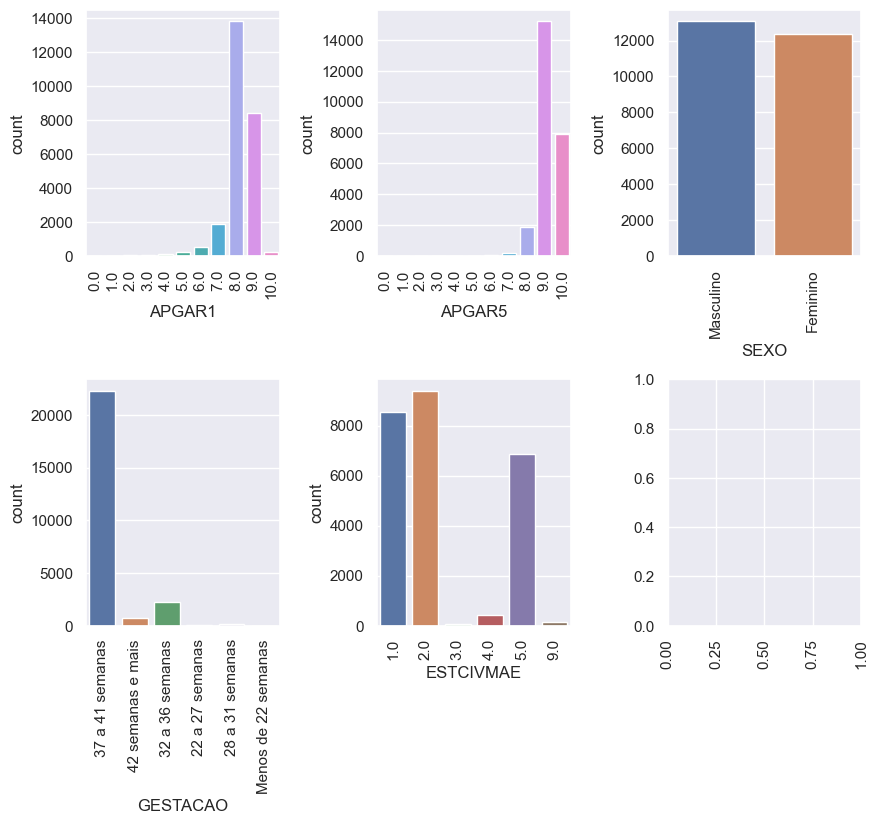

In [39]:
plt.rc('figure', figsize=(10,8))
fig, axes = plt.subplots(2,3)

sns.countplot(ax=axes[0,0], x='APGAR1', data=df_ex2)
sns.countplot(ax=axes[0,1], x='APGAR5', data=df_ex2)
sns.countplot(ax=axes[0,2], x='SEXO', data=df_ex2)
sns.countplot(ax=axes[1,0], x='GESTACAO', data=df_ex2)
sns.countplot(ax=axes[1,1], x='ESTCIVMAE', data=df_ex2)

for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=90)

fig.subplots_adjust(hspace=0.5, wspace=0.5)


## 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [41]:
df_apgar5 = df[['APGAR5', 'CONSULTAS']]

<Axes: xlabel='CONSULTAS', ylabel='APGAR5'>

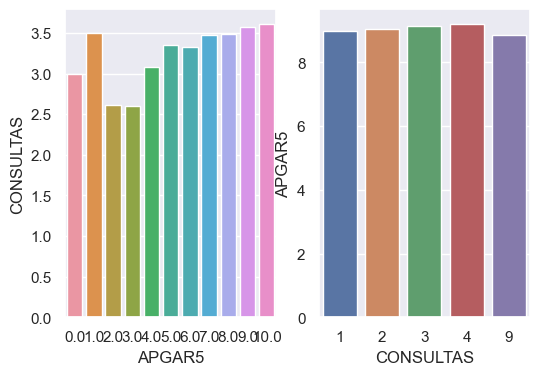

In [60]:
plt.close('all')
plt.rc('figure', figsize=(6,4))

fig, axes = plt.subplots(1,2)

sns.barplot(ax=axes[0], x='APGAR5', y='CONSULTAS', data=df_apgar5, errorbar=None)
sns.barplot(ax=axes[1], x='CONSULTAS', y='APGAR5', data=df_apgar5, errorbar=None)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

In [61]:
df_ex4 = df[['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']]

In [62]:
df_ex4.dropna()

,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,Masculino,37 a 41 semanas,5.0,4
1,Feminino,37 a 41 semanas,2.0,4
2,Feminino,37 a 41 semanas,9.0,4
3,Feminino,37 a 41 semanas,5.0,3
4,Feminino,37 a 41 semanas,2.0,4
...,...,...,...,...
27023,Masculino,32 a 36 semanas,2.0,4
27024,Masculino,37 a 41 semanas,1.0,4
27025,Masculino,37 a 41 semanas,2.0,4
27026,Masculino,32 a 36 semanas,2.0,4


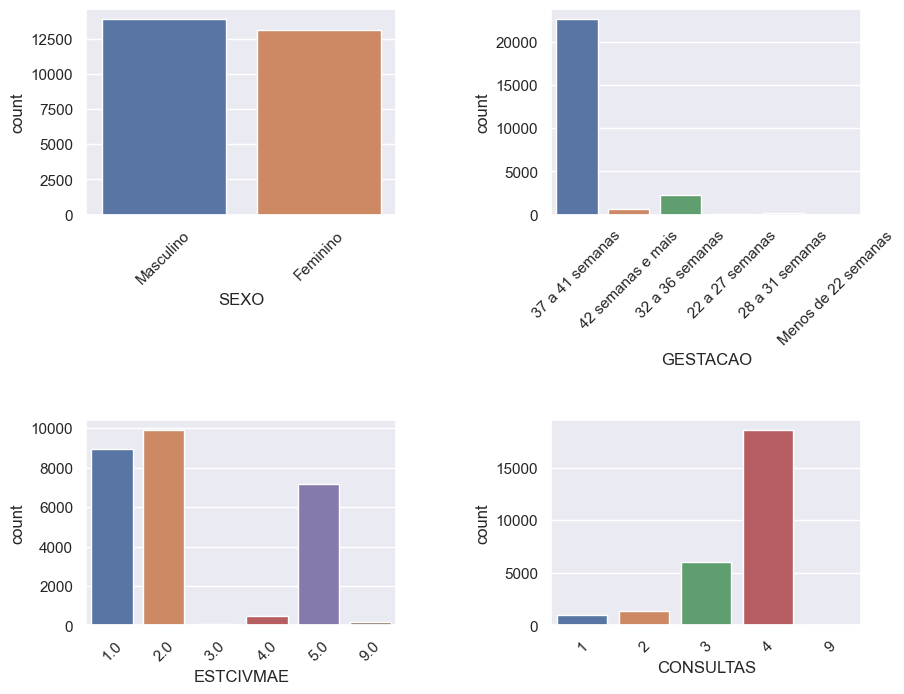

In [73]:
plt.close('all')
plt.rc('figure', figsize=(10,8))

fig, axes = plt.subplots(2,2)

sns.countplot(ax=axes[0,0], x='SEXO', data=df_ex4)
sns.countplot(ax=axes[0,1], x='GESTACAO', data=df_ex4)
sns.countplot(ax=axes[1,0], x='ESTCIVMAE', data=df_ex4)
sns.countplot(ax=axes[1,1], x='CONSULTAS', data=df_ex4)

plt.subplots_adjust(wspace=0.5, hspace=1)

for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=45)